# Tilted Beam (HG00 with HG10 quadrature phase addition)

A relative tilt between the input and cavity axis can be expressed as an addition of a first-order mode in quadrature phase, 

\begin{equation} \label{eq:10}
    u_{tilt}(x,y,0)=u_{00}(x,y,0)+\frac{i a \pi w_{0}}{\lambda}u_{10}(x,y,0)\;.
\end{equation}

This addition varies the phase of the wave in the x-direction

\begin{equation} \label{eq:11}
    u_{tilt}(x,y,0)=u_{00}(x,y,0) \exp(i\phi)\;.
\end{equation}

Expressing this in terms of a quadrature phase addition of $u_{10}$, with $\alpha << \frac{\lambda}{w_{0}\pi}$:


\begin{align}\label{eq:12}
    u_{tilt (0,0)} 
        =& u_{00} \exp(i \phi)
    \nonumber\\	
        = & u_{00} \exp \left[ikx \sin(\alpha) \right] 
    \nonumber\\	
        \approx & u_{00} \exp \left[ ikx\alpha \right]
    \nonumber\\
        = & u_{00} \exp \left[ i \frac{2 \pi x \alpha}{\lambda} \right]
    \nonumber\\ 
        \approx & u_{00} \left[
        1 + i \frac{2 \pi x \alpha}{\lambda} \right]
        \nonumber\\
        = & u_{00}(x,y,0) + i  \frac{\pi w_{0} \alpha}{\lambda}u_{10} \; .
\end{align}

***

Therefore, the predicted angle scales proportionally with the imaginary part of the coefficient of the $u_{10}$ mode, $C_{10}$,

\begin{equation}
    \alpha \approx \frac{|\Im(C_{10})|}{\Re(C_{00})}\frac{ \lambda}{\pi w_{0} } \approx \frac{|\Im(C_{10})|}{\Re(C_{00})}\Theta \; ,
\end{equation}
	
where $\Theta = \frac{\pi w_{0}}{\lambda}$ is the diffraction angle.

Phase should vary with $x$ as
	
\begin{equation}\label{eq:21}
    \frac{d\phi}{dx} \approx \frac{2 \pi \alpha}{\lambda} \; .
\end{equation}

In [2]:
import PauLisa as pl, numpy as np
a = pl.defaultParams
b = pl.defaultPlane
c=pl

In [4]:
# Re[a10]/a00 = delta s/wo , w0 = 1e-3

c = pl.Plane(0e-5,5e-5,1001,-1e-3,1e-3,3)

a10 = .04*1j
a00 = 1

m0 = pl.modes((0,0,a00))
m1 = pl.modes((1,0,a10))
m = pl.modes((1,0,1))
m01 = pl.modes((0,0,a00),(1,0,a10))

f0 =pl.calculate(a,c,m0,0)
f1 =pl.calculate(a,c,m1,0)
f01a = pl.calculate(a,c,m01,0)
fa = pl.calculate(a,c,m,0)


theta=a.wavelength/pl.pi/a.w0

pred_theta = theta*abs(a10)

phase_comb=(f01a.phase[1,:])
phase_diff=(phase_comb[-1]-phase_comb[0])
phase_ang = phase_diff/(c.getX()[-1]-c.getX()[0])
act_theta = phase_ang/2/np.pi*a.wavelength


# Re[a10]/a00 = delta s/wo , w0 = 1e-3

a10 = .08*1j
a00 = 1

m0 = pl.modes((0,0,a00))
m1 = pl.modes((1,0,a10))
m = pl.modes((1,0,1))
m01 = pl.modes((0,0,a00),(1,0,a10))

f0 =pl.calculate(a,c,m0,0)
f1 =pl.calculate(a,c,m1,0)
f01b = pl.calculate(a,c,m01,0)
fa = pl.calculate(a,c,m,0)

theta=a.wavelength/pl.pi/a.w0

pred_theta = theta*abs(a10)

phase_adv= pl.phase(a,0,0,a.Zr,m01)-pl.phase(a,0,0,0,m01)

phase_comb=(f01b.phase[1,:])
phase_diff=(phase_comb[-1]-phase_comb[0])
phase_ang = phase_diff/(c.getX()[-1]-c.getX()[0])
act_theta = phase_ang/2/np.pi*a.wavelength


# Re[a10]/a00 = delta s/wo , w0 = 1e-3

a10 = .16*1j
a00 = 1

m0 = pl.modes((0,0,a00))
m1 = pl.modes((1,0,a10))
m = pl.modes((1,0,1))
m01 = pl.modes((0,0,a00),(1,0,a10))

f0 =pl.calculate(a,c,m0,0)
f1 =pl.calculate(a,c,m1,0)
f01c = pl.calculate(a,c,m01,0)
fa = pl.calculate(a,c,m,0)

theta=a.wavelength/pl.pi/a.w0

pred_theta = theta*abs(a10)

phase_adv= pl.phase(a,0,0,a.Zr,m01)-pl.phase(a,0,0,0,m01)

phase_comb=(f01c.phase[1,:])
phase_diff=(phase_comb[-1]-phase_comb[0])
phase_ang = phase_diff/(c.getX()[-1]-c.getX()[0])
act_theta = phase_ang/2/np.pi*a.wavelength

print("expected d phi/dx:",2*np.pi*1.35e-5/a.wavelength,2*np.pi*2.709e-5/a.wavelength,2*np.pi*5.4189e-5/a.wavelength)

expected d phi/dx: 79.72086620951542 159.97320486042761 319.9995569649949


# RESULTS

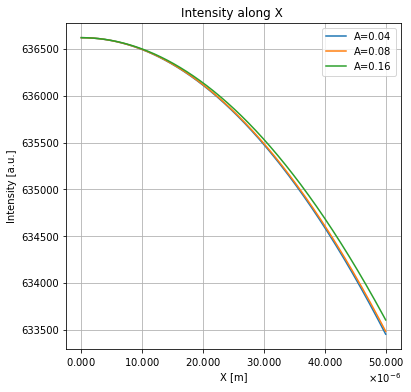

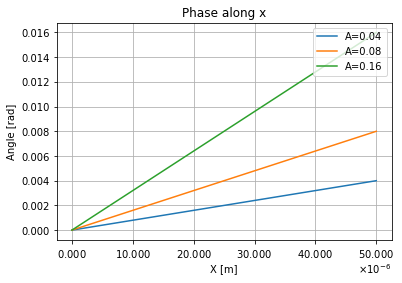

In [3]:
pl.intslicex(0,f01a,f01b,f01c,labels=['A=0.04','A=0.08','A=0.16'])
pl.phaseslicex(0,f01a,f01b,f01c,labels=['A=0.04','A=0.08','A=0.16'], ylim=[1.5,1.6])

| (1,0) Scale (imag.) | Pred. Angle[$\times 10^{-5}$ rad.]   | Calc. Angle[$\times10^{-5}$ rad.] | % Error   | Approx. $\frac{d \phi}{d x}$ [rad/m]|
|------|------|------|------|------|
|   0.04  | 1.3547|   1.3518  | 0.00212| 80 |
|   0.08  | 2.7094|   2.6866  | 0.00840| 160 |
|   0.16  | 5.4189|   5.2445  | 0.306217| 320 |